Elisabeth Vehling
INF 352
Lab 4

In [6]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection
import math as math
import numpy as np

**(a) Download YouTube Spam Collection data set**

In [7]:
#Load eminem data set
data = pd.read_csv('../data/Youtube04-Eminem.csv')

**(b) Select the first 80% of hams and first 80% of spams as training set and rest as test set**

In [8]:
#Divide dataset into ham and spam
ham = data.loc[data['CLASS'] == 0]
spam = data.loc[data['CLASS'] == 1]

#Split ham into train and test data
hamTrainIndex = math.floor(ham.shape[0]*.8)
hamTrain = ham.iloc[0:hamTrainIndex, :]
hamTest = ham.iloc[hamTrainIndex:, :]

#Split spam into train and test data
spamTrainIndex = math.floor(spam.shape[0]*.8)
spamTrain = spam.iloc[0:spamTrainIndex, :]
spamTest = spam.iloc[spamTrainIndex:, :]

#Concat the training and testing datasets
train = pd.concat([hamTrain, spamTrain])
test = pd.concat([hamTest,spamTest])

**(c) Represent each comment using TF-IDF features. Consider each comment a document and the whole set of comments in the file as the corpus**

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(train['CONTENT'])
x_test = vectorizer.transform(test['CONTENT'])

**(d) L2 Penalized Logistic regression**

In [10]:
# import numpy as np
x_train = x_train.toarray()
x_test = x_test.toarray()

X = np.nan_to_num(x_train)
Y = np.nan_to_num(train.CLASS)

**(i) determine lambda using 5-fold CV on training set. Consiter log10 lamda is in the set of {-5->5}**

In [11]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
#Lamdas to test:
cs =[-5,-4,-3,-2,-1,0,1,2,3,4,5]

lamda = 0
max_score = 0
#Iterate through each possible lamda
for c in cs:
    #Lambda:
    l = 1/(10**(c))
    
    #Five-fold cross validation
    kf = KFold(n_splits=5)
    avg_score = 0;
    for train_i, test_i in kf.split(X):
        #Get the training and testing data for the fold
        X_train, X_test = X[train_i], X[test_i]
        y_train, y_test = Y[train_i], Y[test_i]
        
        #Fit LR model on training data
        lr = LogisticRegression(penalty='l2', C=l, solver = 'lbfgs').fit(X_train, y_train)
        score = lr.score(X_test, y_test )
        avg_score += score
    avg_score /=5;
    print("C=",c, "average score:" , avg_score)
    if avg_score > max_score:
        max_score = avg_score
        lamda = c
#iterate thru lambda value, then tts into 5 folds (5 tts?) then fit LR model, test, return lamda with highest .score
print("Best lamda:", lamda)

C= -5 average score: 0.9023082942097027
C= -4 average score: 0.8995305164319249
C= -3 average score: 0.8939358372456964
C= -2 average score: 0.8911971830985916
C= -1 average score: 0.8687793427230048
C= 0 average score: 0.6985524256651017
C= 1 average score: 0.23998435054773082
C= 2 average score: 0.125
C= 3 average score: 0.05
C= 4 average score: 0.05
C= 5 average score: 0.05
Best lamda: -5


**(ii) Train L2 penalized LR using the lambda from above. Calculate confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for training set**

In [14]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

#change C to be 1/lamda 
#Fit a LR model with the lamda from above
lr = LogisticRegression(penalty='l2', C=1/(10**lamda), solver='lbfgs').fit(x_train, train["CLASS"] )

predictions = lr.predict(x_train)
scores = lr.score(x_train, train["CLASS"])
probs = lr.predict_proba(x_train)
probs = probs[:,1]

#Precision, recall, F1
print("Train Classification Report:")
accuracy = metrics.accuracy_score(train["CLASS"], predictions)
precision, recall, fscore, support = precision_recall_fscore_support(train["CLASS"], predictions, pos_label=1, average= 'binary')

print("Accuracy:", accuracy, "\nPrecision:",precision, "\nRecall:",recall, "\nF1:", fscore)


#Confusion Matrix
cm = metrics.confusion_matrix(train["CLASS"], predictions)
print("Train Confusion Matrix: \n", cm)


Train Classification Report:
Accuracy: 1.0 
Precision: 1.0 
Recall: 1.0 
F1: 1.0
Train Confusion Matrix: 
 [[162   0]
 [  0 196]]


Train AUC:  1.0
Train ROC:


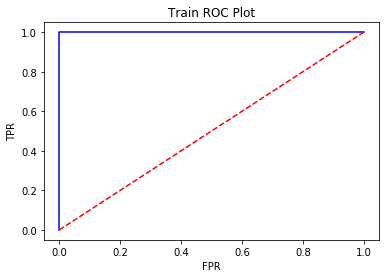

In [15]:
import matplotlib.pyplot as plt

#Calcualte ROC features
fpr, tpr, thresholds = metrics.roc_curve(train["CLASS"], probs, pos_label=1)

#Calculate AUC
roc_auc = metrics.auc(fpr, tpr)

#Plot ROC
print('Train AUC: ', roc_auc)
print("Train ROC:")
plt.title('Train ROC Plot')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'%roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()


**(iii) Test on test set and calculate confusion matrix, accuracy, precision, recall, and F1 score + ROC curve and AUC for test set. **

In [16]:
#Fit a LR model with the lamda 
lr = LogisticRegression(penalty='l2', C=1/(10**lamda), solver='lbfgs').fit(x_train, train["CLASS"] )

predictions = lr.predict(x_test)
scores = lr.score(x_test, test["CLASS"])
probs = lr.predict_proba(x_test)
probs = probs[:,1]

#Precision, recall, F1
print("Test Classification Report:")
accuracy = metrics.accuracy_score(test["CLASS"], predictions)
precision, recall, fscore, support = precision_recall_fscore_support(test["CLASS"], predictions, pos_label=1, average= 'binary')

print("Accuracy:", accuracy, "\nPrecision:",precision, "\nRecall:",recall, "\nF1:", fscore)

#Confusion Matrix
cm = metrics.confusion_matrix(test["CLASS"], predictions)
print("Test Confusion Matrix: \n", cm)


Test Classification Report:
Accuracy: 0.9666666666666667 
Precision: 0.9791666666666666 
Recall: 0.9591836734693877 
F1: 0.9690721649484536
Test Confusion Matrix: 
 [[40  1]
 [ 2 47]]


Test AUC:  0.9970134395221503
Test ROC:


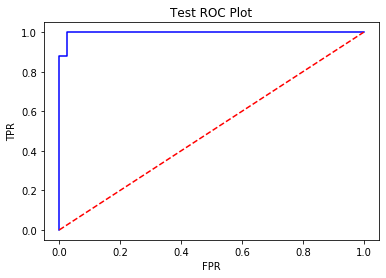

In [17]:
#Calcualte ROC features
fpr, tpr, thresholds = metrics.roc_curve(test["CLASS"], probs, pos_label=1)

#Calculate AUC
roc_auc = metrics.auc(fpr, tpr)

#Plot ROC
print('Test AUC: ', roc_auc)
print("Test ROC:")
plt.title('Test ROC Plot')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'%roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()


**Which one is more important in this application, precision or recall?** I believe that recall is more important in this application, as we care about how the percentage of positive spam instances our algorithm correctly classified.

**Calculate F beta score for B's = {0.1,0.5,0.9,1,5,10}**

In [18]:
from sklearn.metrics import fbeta_score
betas = [0.1, 0.5, 0.9, 1.0, 5.0, 10.0]
scores = []
for b in betas:
    score = fbeta_score(test["CLASS"], predictions, beta=b)
    scores.append(score)
for i in range(6):
    print("Beta:", betas[i], "\tScore:", scores[i])

Beta: 0.1 	Score: 0.9789647349969065
Beta: 0.5 	Score: 0.975103734439834
Beta: 0.9 	Score: 0.9701220207549323
Beta: 1.0 	Score: 0.9690721649484536
Beta: 5.0 	Score: 0.959937156323645
Beta: 10.0 	Score: 0.9593775262732418


**1(e)ii. Train L1 penalized LR using lamda from 1(e)i. Calculate confustion matrix, accuracy, precision, recall, F1 score as well as ROC curve and AUC for your training set**

In [19]:
#Lamdas:
cs =[-5,-4,-3,-2,-1,0,1,2,3,4,5]

lamda = 0
max_score = 0
#Iterate through each possible lamda
for c in cs:
    #Lambda:
    l = 1/(10**(c))
    
    #Five-fold cross validation
    kf = KFold(n_splits=5)
    avg_score = 0;
    for train_i, test_i in kf.split(X):
        #Get the training and testing data for the fold
        X_train, X_test = X[train_i], X[test_i]
        y_train, y_test = Y[train_i], Y[test_i]
        
        #Fit LR model on training data
        lr = LogisticRegression(penalty='l1', C=l, solver = 'liblinear').fit(X_train, y_train)
        score = lr.score(X_test, y_test )
        avg_score += score
    avg_score /=5;
    print("C=",c, "average score:" , avg_score)
    if avg_score > max_score:
        max_score = avg_score
        lamda = c
#iterate thru lambda value, then tts into 5 folds (5 tts?) then fit LR model, test, return lamda with highest .score
print("Best lamda:", lamda)

C= -5 average score: 0.8546948356807512
C= -4 average score: 0.9219483568075117
C= -3 average score: 0.9219092331768388
C= -2 average score: 0.9247261345852895


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C= -1 average score: 0.930320813771518
C= 0 average score: 0.8685054773082943
C= 1 average score: 0.05
C= 2 average score: 0.45
C= 3 average score: 0.45
C= 4 average score: 0.45
C= 5 average score: 0.45
Best lamda: -1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**1(e)i. Determine lamda using 5-fold CV on your training set.**

In [20]:
#Fit a LR model with the lamda from above
lr = LogisticRegression(penalty='l1', C=1/(10**lamda), solver='liblinear').fit(x_train, train["CLASS"] )

predictions = lr.predict(x_train)
scores = lr.score(x_train, train["CLASS"])
probs = lr.predict_proba(x_train)
probs = probs[:,1]

#Precision, recall, F1
print("Train Classification Report:")
accuracy = metrics.accuracy_score(train["CLASS"], predictions)
precision, recall, fscore, support = precision_recall_fscore_support(train["CLASS"], predictions, pos_label=1, average= 'binary')

print("Accuracy:", accuracy, "\nPrecision:",precision, "\nRecall:",recall, "\nF1:", fscore)

#Confusion Matrix
cm = metrics.confusion_matrix(train["CLASS"], predictions)
print("Train Confusion Matrix: \n", cm)


Train Classification Report:
Accuracy: 1.0 
Precision: 1.0 
Recall: 1.0 
F1: 1.0
Train Confusion Matrix: 
 [[162   0]
 [  0 196]]


**1(e)iii. Test the algorithm on the test set and calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for the test set**

In [21]:
#Fit a LR model with the lamda 
lr = LogisticRegression(penalty='l1', C=1/(10**lamda), solver='liblinear').fit(x_train, train["CLASS"] )

predictions = lr.predict(x_test)
scores = lr.score(x_test, test["CLASS"])
probs = lr.predict_proba(x_test)
probs = probs[:,1]

#Precision, recall, F1
print("Test Classification Report:")
accuracy = metrics.accuracy_score(test["CLASS"], predictions)
precision, recall, fscore, support = precision_recall_fscore_support(test["CLASS"], predictions, pos_label=1, average= 'binary')

print("Accuracy:", accuracy, "\nPrecision:",precision, "\nRecall:",recall, "\nF1:", fscore)

#Confusion Matrix
cm = metrics.confusion_matrix(test["CLASS"], predictions)
print("Test Confusion Matrix: \n", cm)

Test Classification Report:
Accuracy: 0.9444444444444444 
Precision: 0.9782608695652174 
Recall: 0.9183673469387755 
F1: 0.9473684210526316
Test Confusion Matrix: 
 [[40  1]
 [ 4 45]]


Test AUC:  0.9965156794425087
Test ROC:


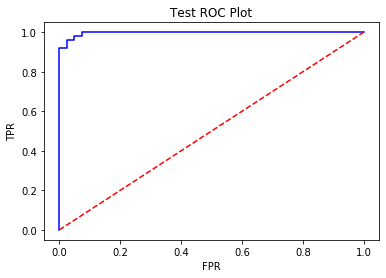

In [22]:
#Calcualte ROC features
fpr, tpr, thresholds = metrics.roc_curve(test["CLASS"], probs, pos_label=1)

#Calculate AUC
roc_auc = metrics.auc(fpr, tpr)

#Plot ROC
print('Test AUC: ', roc_auc)
print("Test ROC:")
plt.title('Test ROC Plot')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'%roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

**1(f) Binary classification using Naiive Bayes' Classifiers**

**1(f)i. Solve the problem using a NB classifier. Use gaussian class conditional distributions. Report the confusion matrix, ROC, precision, recall, F1, and AUC for both the train and test data sets**

In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, train["CLASS"])

predictions = nb.predict(x_train)
scores = nb.score(x_train, train["CLASS"])
probs = nb.predict_proba(x_train)
probs = probs[:,1]

#Precision, recall, F1
print("Naiive Bayes Train Classification Report:")
accuracy = metrics.accuracy_score(train["CLASS"], predictions)
precision, recall, fscore, support = precision_recall_fscore_support(train["CLASS"], predictions, pos_label=1, average= 'binary')

print("Accuracy:", accuracy, "\nPrecision:",precision, "\nRecall:",recall, "\nF1:", fscore)

#Confusion Matrix
cm = metrics.confusion_matrix(train["CLASS"], predictions)
print("Naiive Bayes Train Confusion Matrix: \n", cm)

Naiive Bayes Train Classification Report:
Accuracy: 0.9972067039106145 
Precision: 1.0 
Recall: 0.9948979591836735 
F1: 0.9974424552429668
Naiive Bayes Train Confusion Matrix: 
 [[162   0]
 [  1 195]]


Naiive Bayes Train AUC:  0.9974489795918368
Naiive Bayes Train ROC:


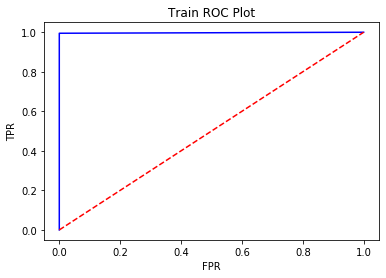

In [24]:
#Calcualte ROC features
fpr, tpr, thresholds = metrics.roc_curve(train["CLASS"], probs, pos_label=1)

#Calculate AUC
roc_auc = metrics.auc(fpr, tpr)

#Plot ROC
print('Naiive Bayes Train AUC: ', roc_auc)
print("Naiive Bayes Train ROC:")
plt.title('Train ROC Plot')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'%roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [25]:
nb = GaussianNB()
nb.fit(x_train, train["CLASS"])

predictions = nb.predict(x_test)
scores = nb.score(x_test, test["CLASS"])
probs = nb.predict_proba(x_test)
probs = probs[:,1]

#Precision, recall, F1
print("Test Classification Report:")
accuracy = metrics.accuracy_score(test["CLASS"], predictions)
precision, recall, fscore, support = precision_recall_fscore_support(test["CLASS"], predictions, pos_label=1, average= 'binary')

print("Accuracy:", accuracy, "\nPrecision:",precision, "\nRecall:",recall, "\nF1:", fscore)

#Confusion Matrix
cm = metrics.confusion_matrix(test["CLASS"], predictions)
print("Test Confusion Matrix: \n", cm)

Test Classification Report:
Accuracy: 0.9222222222222223 
Precision: 0.8888888888888888 
Recall: 0.9795918367346939 
F1: 0.9320388349514563
Test Confusion Matrix: 
 [[35  6]
 [ 1 48]]


Test AUC:  0.9166251866600298
Test ROC:


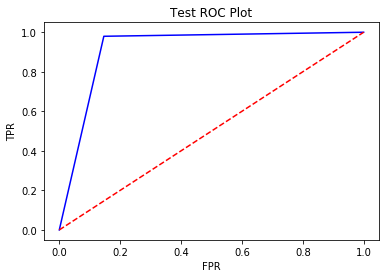

In [26]:
#Calcualte ROC features
fpr, tpr, thresholds = metrics.roc_curve(test["CLASS"], probs, pos_label=1)

#Calculate AUC
roc_auc = metrics.auc(fpr, tpr)

#Plot ROC
print('Test AUC: ', roc_auc)
print("Test ROC:")
plt.title('Test ROC Plot')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'%roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

**1(g). (Extra Credit, 5 points) Repeat 1(f)i using multinomial priors.**

Multinomial Naiive Bayes Train Classification Report:
Accuracy: 0.9776536312849162 
Precision: 0.9653465346534653 
Recall: 0.9948979591836735 
F1: 0.9798994974874372
Multinomial Naiive Bayes Train Confusion Matrix: 
 [[155   7]
 [  1 195]]

Multinomial NB Train AUC:  0.999023683547493
Multinomial NB Train ROC:


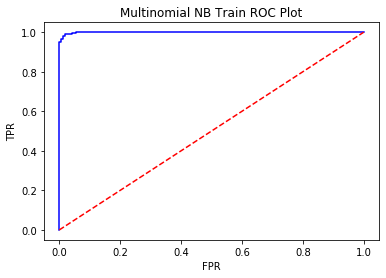

In [27]:
from sklearn.naive_bayes import MultinomialNB
#Create a new naiive bayes classifier
g = MultinomialNB()

#Fit with the training data
predictions = g.fit(x_train, train["CLASS"]).predict(x_train)

#Make predictions for test data
probs = g.predict_proba(x_train)
probs = probs[:,1]

print("Multinomial Naiive Bayes Train Classification Report:")
accuracy = metrics.accuracy_score(train["CLASS"], predictions)
precision, recall, fscore, support = precision_recall_fscore_support(train["CLASS"], predictions, pos_label=1, average= 'binary')

print("Accuracy:", accuracy, "\nPrecision:",precision, "\nRecall:",recall, "\nF1:", fscore)

#Confusion Matrix
cm = metrics.confusion_matrix(train["CLASS"], predictions)
print("Multinomial Naiive Bayes Train Confusion Matrix: \n", cm)

#plot ROC
fpr, tpr, thresholds = metrics.roc_curve(train["CLASS"], probs, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

print('\nMultinomial NB Train AUC: ', roc_auc)
print("Multinomial NB Train ROC:")
plt.title('Multinomial NB Train ROC Plot')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'%roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()


Multinomial Naiive Bayes Test Classification Report:
Accuracy: 0.9 
Precision: 0.8448275862068966 
Recall: 1.0 
F1: 0.9158878504672897
Multinomial Naiive Bayes Test Confusion Matrix: 
 [[32  9]
 [ 0 49]]

Multinomial NB Test AUC:  0.9980089596814335
Multinomial NB Test ROC:


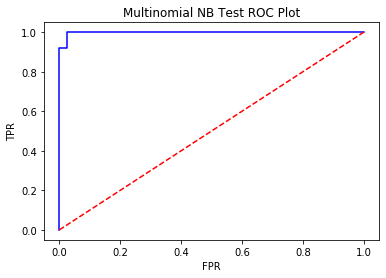

In [28]:
#Create a new naiive bayes classifier
g = MultinomialNB()

#Fit with the training data
predictions = g.fit(x_train, train["CLASS"]).predict(x_test)

#Make predictions for test data
probs = g.predict_proba(x_test)
probs = probs[:,1]

print("Multinomial Naiive Bayes Test Classification Report:")
accuracy = metrics.accuracy_score(test["CLASS"], predictions)
precision, recall, fscore, support = precision_recall_fscore_support(test["CLASS"], predictions, pos_label=1, average= 'binary')

print("Accuracy:", accuracy, "\nPrecision:",precision, "\nRecall:",recall, "\nF1:", fscore)

#Confusion Matrix
cm = metrics.confusion_matrix(test["CLASS"], predictions)
print("Multinomial Naiive Bayes Test Confusion Matrix: \n", cm)

#plot ROC
fpr, tpr, thresholds = metrics.roc_curve(test["CLASS"], probs, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

print('\nMultinomial NB Test AUC: ', roc_auc)
print("Multinomial NB Test ROC:")
plt.title('Multinomial NB Test ROC Plot')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'%roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()


**1(h) (Extra Credit, 20 points) Create one table for each of the five data sets: Shakira,
Eminem, LMFAO, KatyPerry, and Psy to compare accuracy, precision, recall, F1 score and AUC of L1-penalized and L2-penalized logistic regression, Na ̈ıve Bayes’ with Gaussian and multinomial priors for the test sets. Use the first ⌊0.8H⌋ of H hams and the first ⌊0.8S⌋ of S spams as your training set and the rest as your test set. Show the best score in each column using boldface. A hypothetical table is shown below:**

In [29]:
from sklearn.metrics import precision_recall_fscore_support

In [37]:
class dataSet:
    def __init__(self, filename):
        self.filename = filename;
        
    def load_data(self):
        self.data = pd.read_csv(self.filename);
        self.vectorize()
        
    def vectorize(self):
        #Divide dataset into ham and spam
        ham = self.data.loc[self.data['CLASS'] == 0]
        spam = self.data.loc[self.data['CLASS'] == 1]

        #Split ham into train and test data
        hamTrainIndex = math.floor(ham.shape[0]*.8)
        hamTrain = ham.iloc[0:hamTrainIndex, :]
        hamTest = ham.iloc[hamTrainIndex:, :]

        #Split spam into train and test data
        spamTrainIndex = math.floor(spam.shape[0]*.8)
        spamTrain = spam.iloc[0:spamTrainIndex, :]
        spamTest = spam.iloc[spamTrainIndex:, :]

        #Concat the training and testing datasets
        self.train = pd.concat([hamTrain, spamTrain])
        self.test = pd.concat([hamTest,spamTest])

        vectorizer = TfidfVectorizer()
        x_train = vectorizer.fit_transform(self.train['CONTENT'])
        x_test = vectorizer.transform(self.test['CONTENT'])
        # import numpy as np
        self.x_train = x_train.toarray()
        self.x_test = x_test.toarray()

        self.X = np.nan_to_num(x_train)
        self.Y = np.nan_to_num(train.CLASS)
        
    def find_best_l2_lamda(self):
        #Lamdas to test:
        cs =[-5,-4,-3,-2,-1,0,1,2,3,4,5]
        lamda = 0
        max_score = 0
        #Iterate through each possible lamda
        for c in cs:
            #Lambda:
            l = 1/(10**(c))

            #Five-fold cross validation
            kf = KFold(n_splits=5)
            avg_score = 0;
            for train_i, test_i in kf.split(self.X):
                #Get the training and testing data for the fold
                X_train, X_test = X[train_i], X[test_i]
                y_train, y_test = Y[train_i], Y[test_i]

                #Fit LR model on training data
                lr = LogisticRegression(penalty='l2', C=l, solver = 'lbfgs').fit(X_train, y_train)
                score = lr.score(X_test, y_test )
                avg_score += score
            avg_score /=5;
            if avg_score > max_score:
                max_score = avg_score
                lamda = c
        #iterate thru lambda value, then tts into 5 folds (5 tts?) then fit LR model, test, return lamda with highest .score
        self.l2lamda = lamda
        
    def l2regression(self):
        self.find_best_l2_lamda()
        #Fit a LR model with the lamda from above
        lr = LogisticRegression(penalty='l2', C=1/(10**self.l2lamda), solver='lbfgs').fit(self.x_train, self.train["CLASS"] )

        predictions = lr.predict(self.x_test)
        scores = lr.score(self.x_test, self.test["CLASS"])
        probs = lr.predict_proba(self.x_test)
        probs = probs[:,1]

        #Precision, recall, F1
        self.l2precision, self.l2recall, self.l2fscore, support= precision_recall_fscore_support(self.test["CLASS"], predictions, pos_label=1, average= 'binary')
        
        #Calcualte ROC features
        fpr, tpr, thresholds = metrics.roc_curve(self.test["CLASS"], probs, pos_label=1)

        #Calculate AUC
        self.l2roc_auc = metrics.auc(fpr, tpr)
        
        self.l2f1 = metrics.f1_score(self.test["CLASS"], predictions)
        self.l2accuracy = metrics.accuracy_score(self.test["CLASS"], predictions)
        
    def find_best_l1_lamda(self):
        #Lamdas to test:
        cs =[-5,-4,-3,-2,-1,0,1,2,3,4,5]
        lamda = 0
        max_score = 0
        #Iterate through each possible lamda
        for c in cs:
            #Lambda:
            l = 1/(10**(c))

            #Five-fold cross validation
            kf = KFold(n_splits=5)
            avg_score = 0;
            for train_i, test_i in kf.split(self.X):
                #Get the training and testing data for the fold
                X_train, X_test = X[train_i], X[test_i]
                y_train, y_test = Y[train_i], Y[test_i]

                #Fit LR model on training data
                lr = LogisticRegression(penalty='l1', C=l, solver = 'liblinear').fit(X_train, y_train)
                score = lr.score(X_test, y_test )
                avg_score += score
            avg_score /=5;
            if avg_score > max_score:
                max_score = avg_score
                lamda = c
        #iterate thru lambda value, then tts into 5 folds (5 tts?) then fit LR model, test, return lamda with highest .score
        self.l1lamda = lamda
        
    def l1regression(self):
        self.find_best_l1_lamda()
        #Fit a LR model with the lamda from above
        lr = LogisticRegression(penalty='l1', C=1/(10**self.l2lamda), solver='liblinear').fit(self.x_train, self.train["CLASS"] )

        predictions = lr.predict(self.x_test)
        scores = lr.score(self.x_test, self.test["CLASS"])
        probs = lr.predict_proba(self.x_test)
        probs = probs[:,1]

        #Precision, recall, F1
        self.l1precision, self.l1recall, self.l1fscore, support= precision_recall_fscore_support(self.test["CLASS"], predictions, pos_label=1, average= 'binary')
        
        #Calcualte ROC features
        fpr, tpr, thresholds = metrics.roc_curve(self.test["CLASS"], probs, pos_label=1)

        #Calculate AUC
        self.l1roc_auc = metrics.auc(fpr, tpr)
        
        self.l1f1 = metrics.f1_score(self.test["CLASS"], predictions)
        self.l1accuracy = metrics.accuracy_score(self.test["CLASS"], predictions)

        
    def nbGaussian(self):
        nb = GaussianNB()
        nb.fit(self.x_train, self.train["CLASS"])

        predictions = nb.predict(self.x_test)
        scores = nb.score(self.x_test, self.test["CLASS"])
        probs = nb.predict_proba(self.x_test)
        probs = probs[:,1]
        #Precision, recall, F1
        self.nbGprecision, self.nbGrecall, self.nbGfscore, support= precision_recall_fscore_support(self.test["CLASS"], predictions, pos_label=1, average= 'binary')
        
        #Calcualte ROC features
        fpr, tpr, thresholds = metrics.roc_curve(self.test["CLASS"], probs, pos_label=1)

        #Calculate AUC
        self.nbGroc_auc = metrics.auc(fpr, tpr)
        
        self.nbGf1 = metrics.f1_score(self.test["CLASS"], predictions)
        self.nbGaccuracy = metrics.accuracy_score(self.test["CLASS"], predictions)

    
    def nbMultinomial(self):
        g = MultinomialNB()
        predictions = g.fit(self.x_train, self.train["CLASS"]).predict(self.x_test)
        #Precision, recall, F1
        self.nbMprecision, self.nbMrecall, self.nbMfscore, support= precision_recall_fscore_support(self.test["CLASS"], predictions, pos_label=1, average= 'binary')
        
        #Make predictions for test data
        probs = g.predict_proba(self.x_test)
        probs = probs[:,1]

        fpr, tpr, thresholds = metrics.roc_curve(self.test["CLASS"], probs, pos_label=1)
        self.nbMroc_auc = metrics.auc(fpr, tpr)
        self.nbMf1 = metrics.f1_score(self.test["CLASS"], predictions)
        self.nbMaccuracy = metrics.accuracy_score(self.test["CLASS"], predictions)


    def display(self):
        c = ["Instance", "Accuracy", "Precision", "Recall", "F1","AUC"]
        d = [['NB-Gaussian', self.nbGaccuracy, self.nbGprecision, self.nbGrecall, self.nbGf1, self.nbGroc_auc],
            ['NB-Multinomial', self.nbMaccuracy, self.nbMprecision, self.nbMrecall, self.nbMf1, self.nbMroc_auc],
            ['L2', self.l2accuracy, self.l2precision, self.l2recall, self.l2f1, self.l2roc_auc],
            ['L1', self.l1accuracy, self.l1precision, self.l1recall, self.l1f1, self.l1roc_auc]] 
        df = pd.DataFrame(d, columns = c)
        print(df)
   
    def calculate_all(self):
        self.load_data()
        self.l2regression()
        self.l1regression()
        self.nbGaussian()
        self.nbMultinomial()
        self.display()

In [38]:
eminem = dataSet('../data/Youtube04-Eminem.csv')
eminem.calculate_all()

         Instance  Accuracy  Precision    Recall        F1       AUC
0     NB-Gaussian  0.922222   0.888889  0.979592  0.932039  0.916625
1  NB-Multinomial  0.900000   0.844828  1.000000  0.915888  0.998009
2              L2  0.966667   0.979167  0.959184  0.969072  0.997013
3              L1  0.966667   0.960000  0.979592  0.969697  0.994525


In [39]:
#Shakira
shakira = dataSet('../data/Youtube05-Shakira.csv')
shakira.calculate_all()

         Instance  Accuracy  Precision    Recall        F1       AUC
0     NB-Gaussian  0.906667   0.833333  1.000000  0.909091  0.912500
1  NB-Multinomial  0.946667   0.918919  0.971429  0.944444  0.995000
2              L2  0.960000   0.944444  0.971429  0.957746  0.997857
3              L1  0.906667   0.911765  0.885714  0.898551  0.982857


In [41]:
#LMFAO
lmfao = dataSet('../data/Youtube03-LMFAO.csv')
lmfao.calculate_all()

         Instance  Accuracy  Precision    Recall        F1       AUC
0     NB-Gaussian  0.898876   0.953488  0.854167  0.901099  0.902693
1  NB-Multinomial  0.876404   0.849057  0.937500  0.891089  0.961382
2              L2  0.943820   0.957447  0.937500  0.947368  0.986280
3              L1  0.921348   0.976744  0.875000  0.923077  0.974085


In [44]:
#KatyPerry
katyperry = dataSet('../data/Youtube02-KatyPerry.csv')
katyperry.calculate_all()

         Instance  Accuracy  Precision    Recall        F1       AUC
0     NB-Gaussian  0.857143   0.820513  0.914286  0.864865  0.857143
1  NB-Multinomial  0.914286   0.939394  0.885714  0.911765  0.961633
2              L2  0.928571   0.941176  0.914286  0.927536  0.968980
3              L1  0.928571   0.968750  0.885714  0.925373  0.967347


In [46]:
#Psy
psy = dataSet('../data/Youtube01-Psy.csv')
psy.calculate_all()

         Instance  Accuracy  Precision    Recall        F1       AUC
0     NB-Gaussian  0.871429   0.861111  0.885714  0.873239  0.871429
1  NB-Multinomial  0.957143   0.944444  0.971429  0.957746  0.997551
2              L2  0.971429   0.971429  0.971429  0.971429  0.999184
3              L1  0.971429   0.971429  0.971429  0.971429  0.996735
